# Search stocks

In [12]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt



In [14]:
yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
# convert symbol column to list

tickers = df['Ticker'].values.tolist()
#t = [x.replace('.', '-') for x in tickers] 
print(tickers)
df
#yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

['ATVI', 'ADBE', 'AMD', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'TEAM', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FB', 'FAST', 'FISV', 'FOXA', 'FOX', 'GILD', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'PCAR', 'PAYX', 'PYPL', 'PTON', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM']


,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
97,"Walgreens Boots Alliance, Inc.",WBA,Consumer Staples,Drug Retail
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy Inc.,XEL,Utilities,Multi-Utilities
100,"Xilinx, Inc.",XLNX,Information Technology,Semiconductors


In [15]:
ma_count = 21

print(dt.datetime(2021,1,1))
data = pdr.get_data_yahoo(tickers, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


2021-01-01 00:00:00
[*********************100%***********************]  102 of 102 completed


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-21,145.399994,612.260010,164.839996,204.470001,301.779999,84.720001,619.650024,138.000000,89.410004,244.850006,...,655.289978,194.240005,187.089996,230.130005,196.270004,46.669998,237.360001,67.059998,135.330002,352.970001
2021-07-22,146.800003,623.679993,162.020004,203.289993,308.510010,84.879997,627.919983,137.179993,91.209999,244.740005,...,649.260010,183.910004,187.199997,233.529999,196.020004,46.490002,237.919998,67.239998,136.470001,361.390015
2021-07-23,148.559998,625.869995,163.550003,206.080002,312.649994,85.980003,638.280029,138.429993,92.150002,247.720001,...,643.380005,186.850006,188.389999,222.539993,200.500000,46.529999,240.399994,68.269997,137.860001,359.230011
2021-07-26,148.990005,620.799988,163.899994,206.270004,313.619995,87.680000,635.580017,138.479996,91.820000,245.080002,...,657.619995,188.259995,186.820007,222.960007,198.929993,47.250000,238.610001,68.309998,135.440002,373.140015
2021-07-27,146.770004,618.280029,162.589996,207.889999,308.250000,89.389999,625.510010,134.899994,91.029999,244.679993,...,644.780029,185.130005,186.699997,219.169998,202.850006,46.820000,230.660004,69.459999,131.000000,367.540009


In [16]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)

ma_week = data.rolling(window=ma_count1).mean()
ma_week_pers = data.div(ma_week).mul(100).sub(100)

df_prep = []
tickers = ma_pers.columns.values.tolist()
for ticker in tickers:
    ma_last = None
    counter = 0
    ma_d = 0
    ma_w = 0
    ma_last = 0
    date = None
    for index, row in ma_pers.iterrows():
        ma_d = ma_pers[ticker][index]
        ma_w = ma_week_pers[ticker][index]
        if ma_d < ma_w:
            date = index
            counter += 1
            ma_last= ma_d - ma_w
        else:
            ma_last = 0
            counter=0
    df_prep.append([ticker, counter, ma_last, ma_count, ma_count1, ma_d, ma_w, date, "cross"]) 
df = DataFrame(df_prep, columns=['name', 'count', 'ma_diff', 'ma_size', 'ma_size1', 'ma_daily', 'ma_weekly', 'last_date', 'ma_type'])\
    .sort_values(by=['count', 'ma_diff'], ascending=False)

lead_comps_df = df[df['count'] >= 2].drop_duplicates(subset=['name'])
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

31


,name,count,ma_diff,ma_size,ma_type
44,MRNA,44,22.561671,21,daily
55,SBUX,22,6.751665,21,daily
18,CPRT,32,4.776543,21,daily
31,GOOG,47,4.495610,21,daily
32,GOOGL,45,4.129094,21,daily
49,ORLY,29,4.104216,21,daily
26,EXC,10,3.984154,21,daily
39,LULU,37,3.811062,21,daily
17,COST,26,3.756046,21,daily
34,IDXX,47,3.748062,21,daily


<ipython-input-17-9cc735d650b0>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


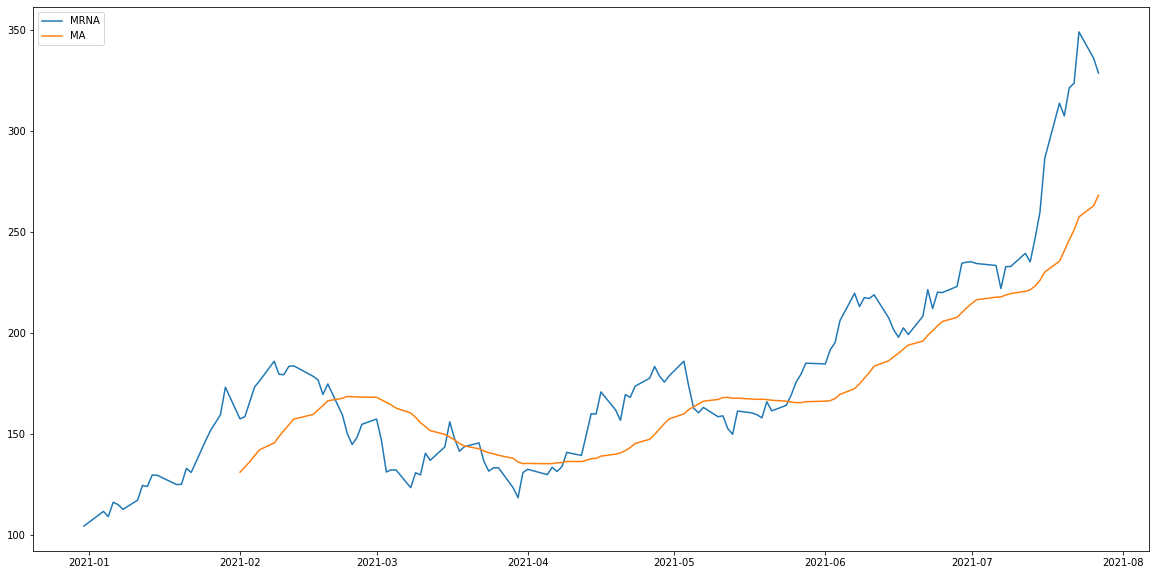

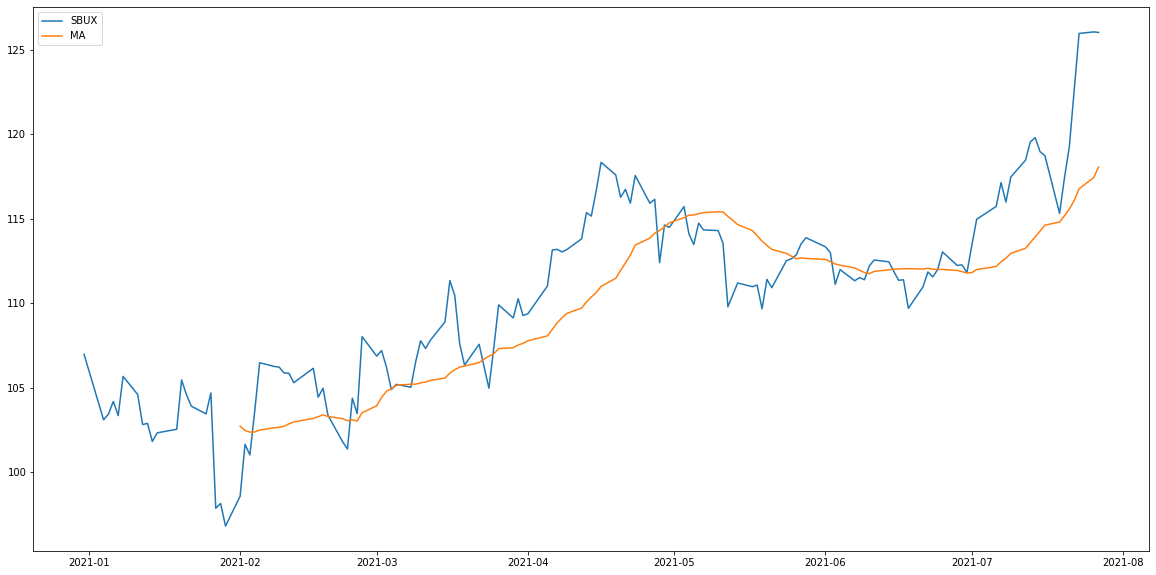

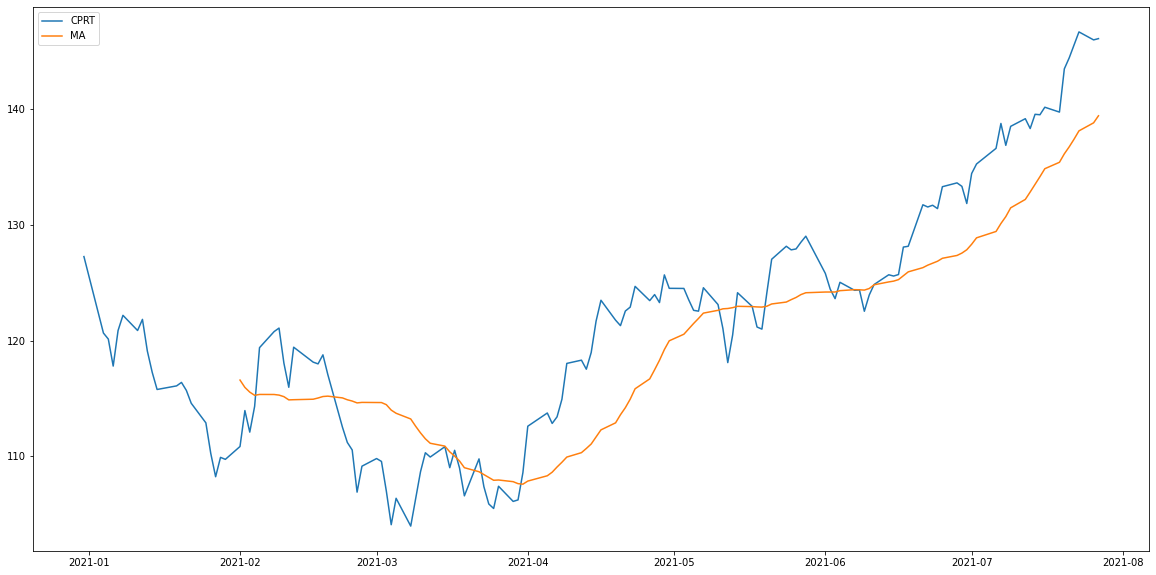

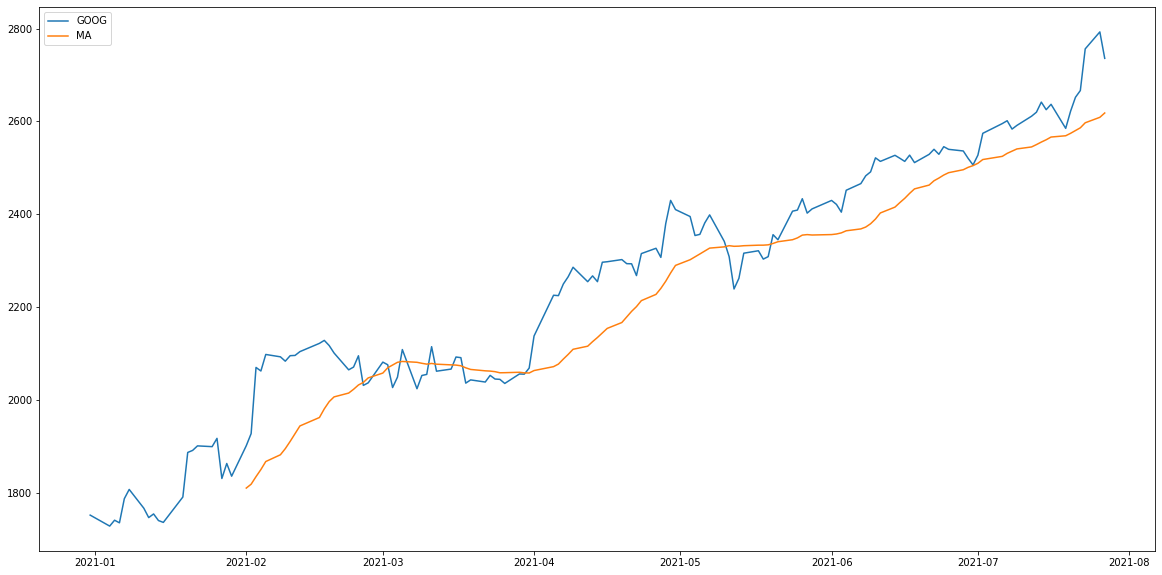

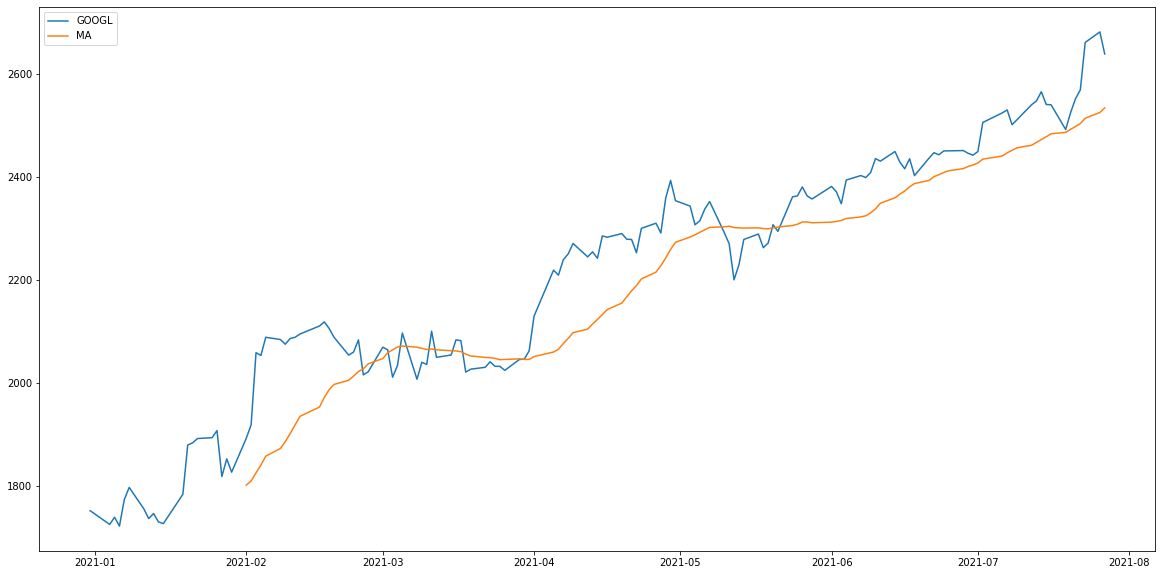

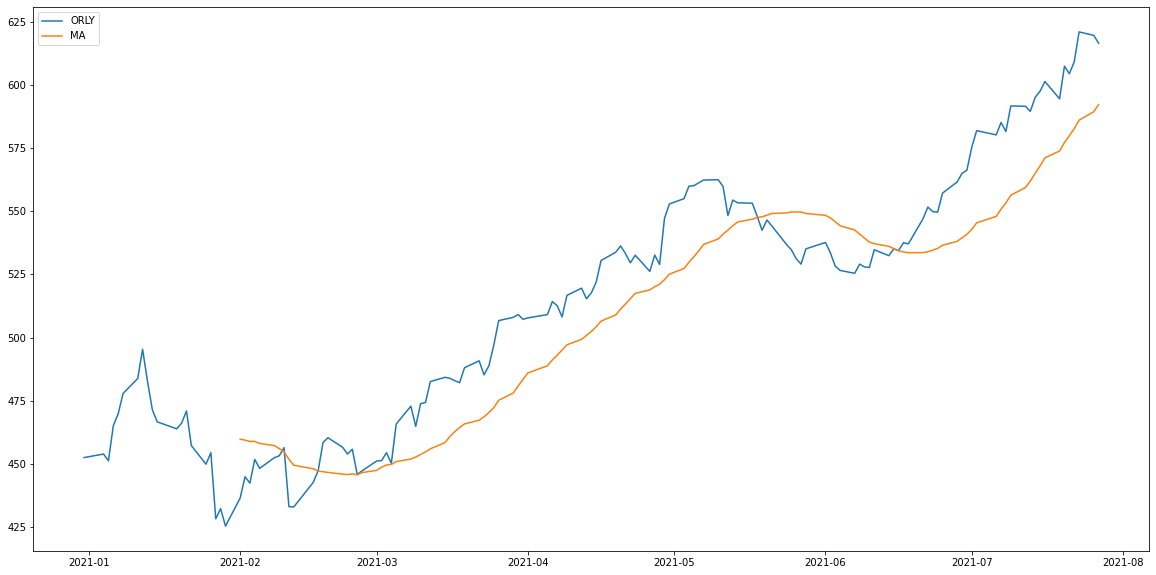

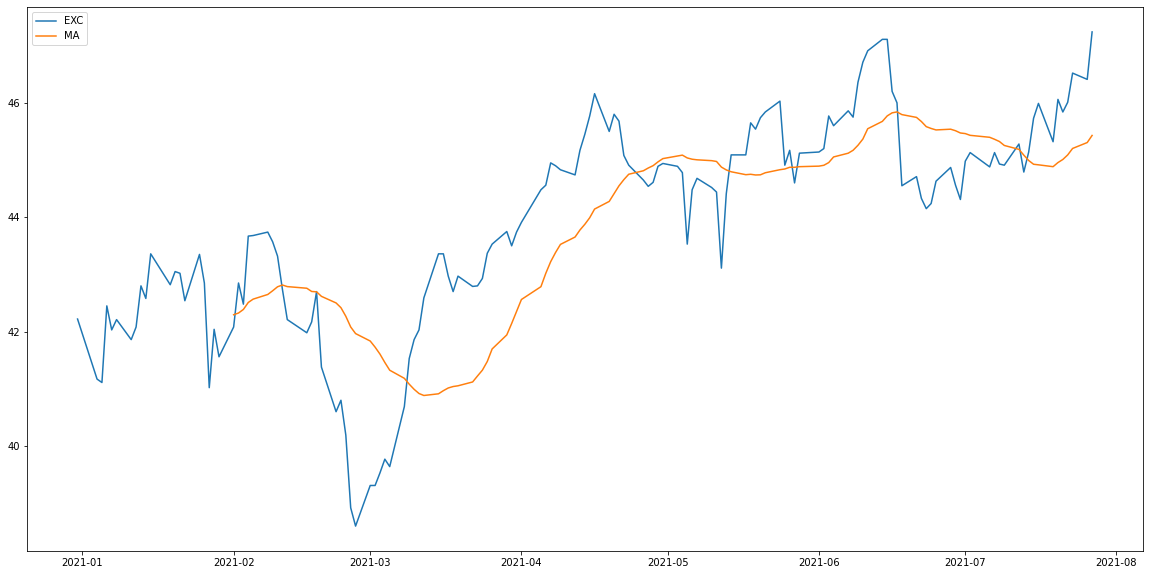

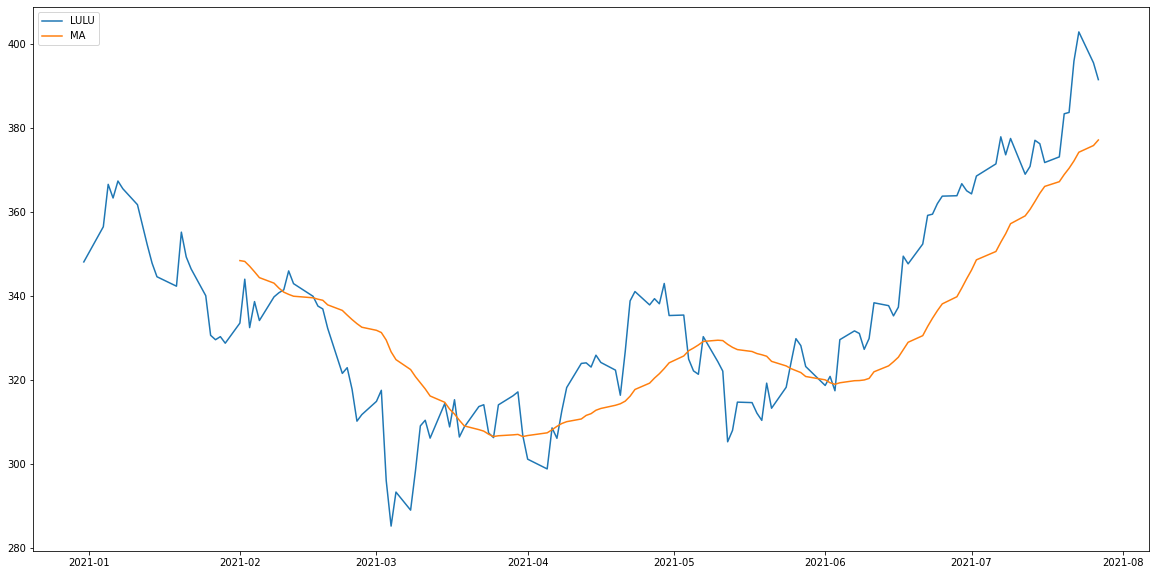

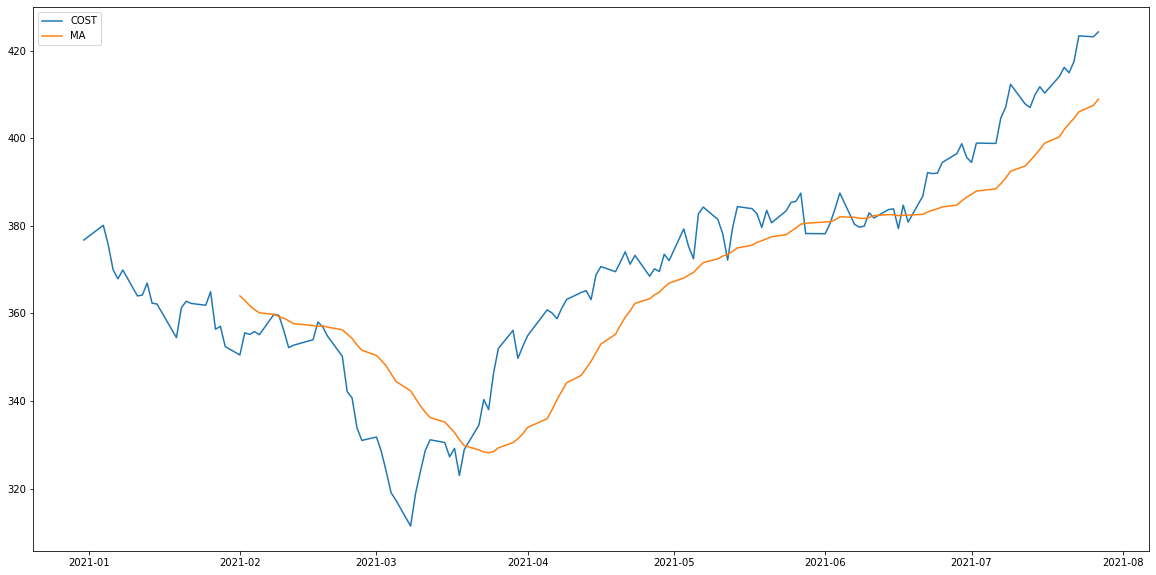

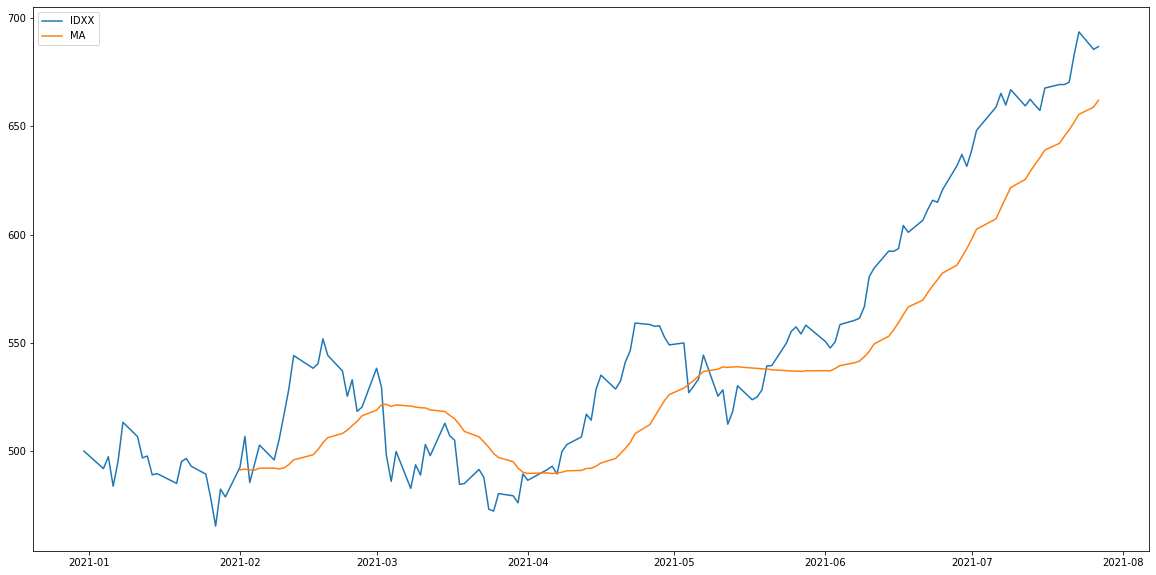

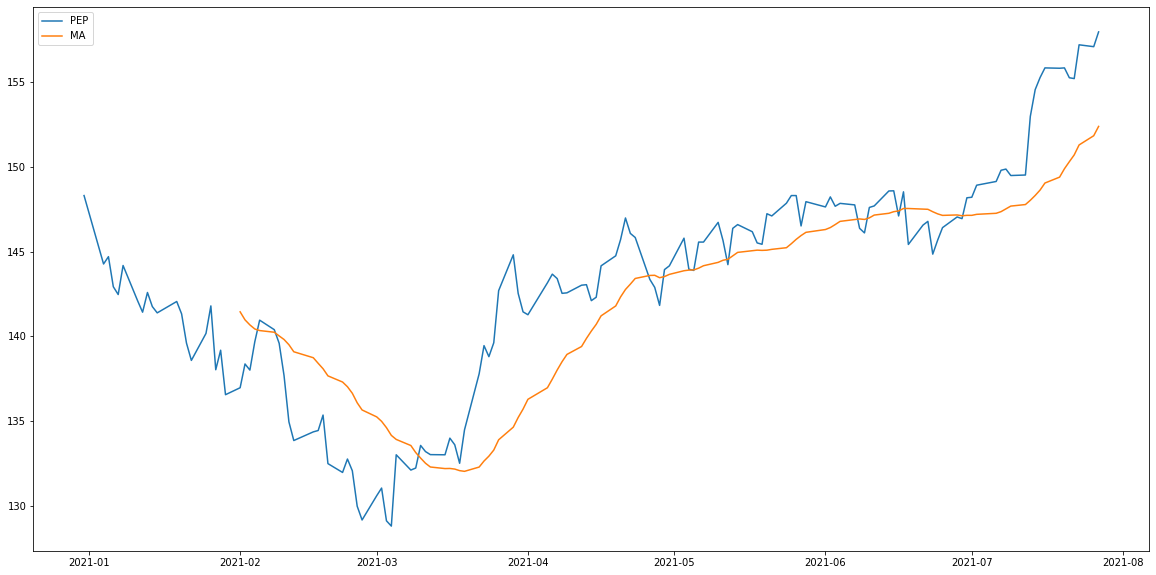

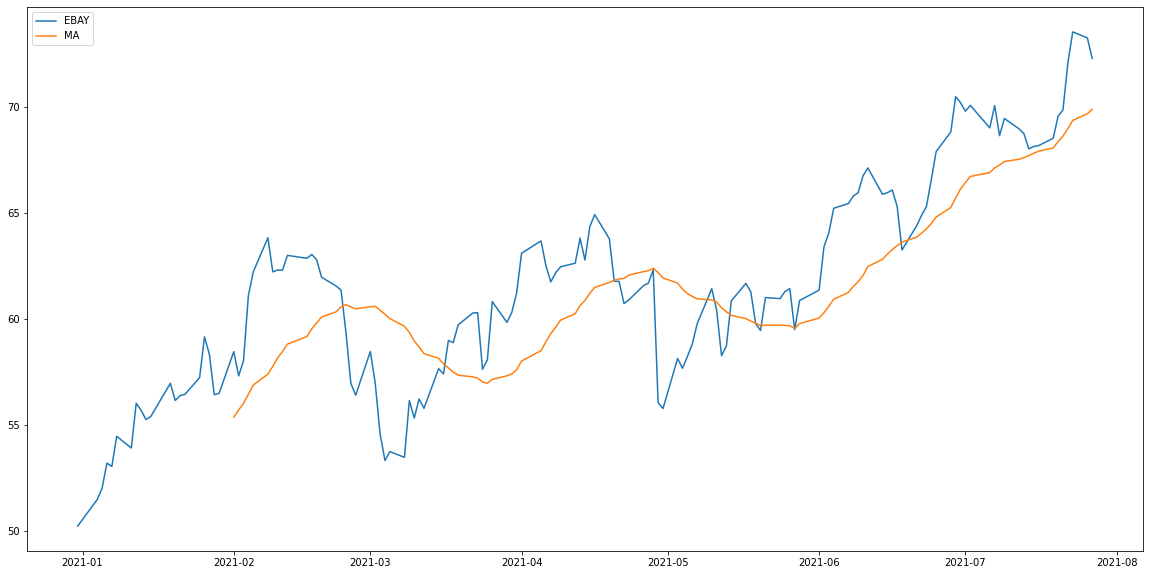

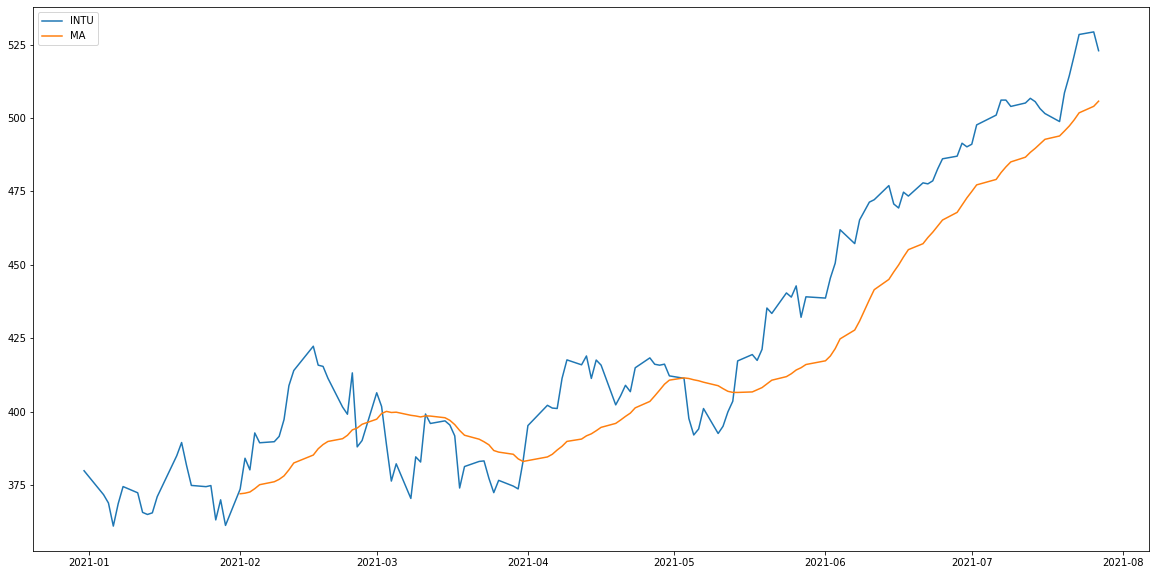

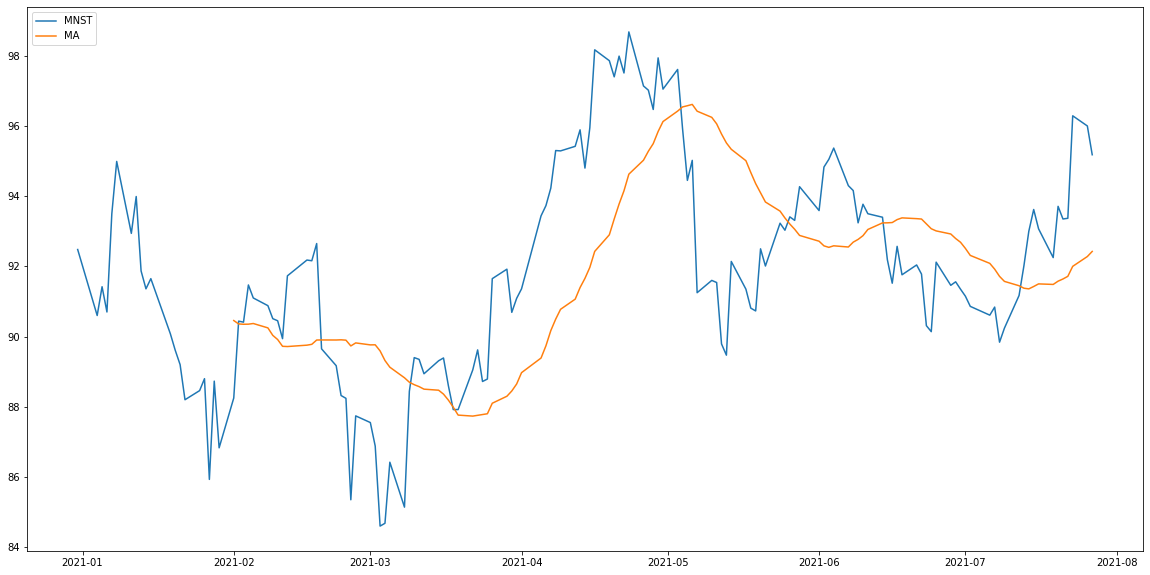

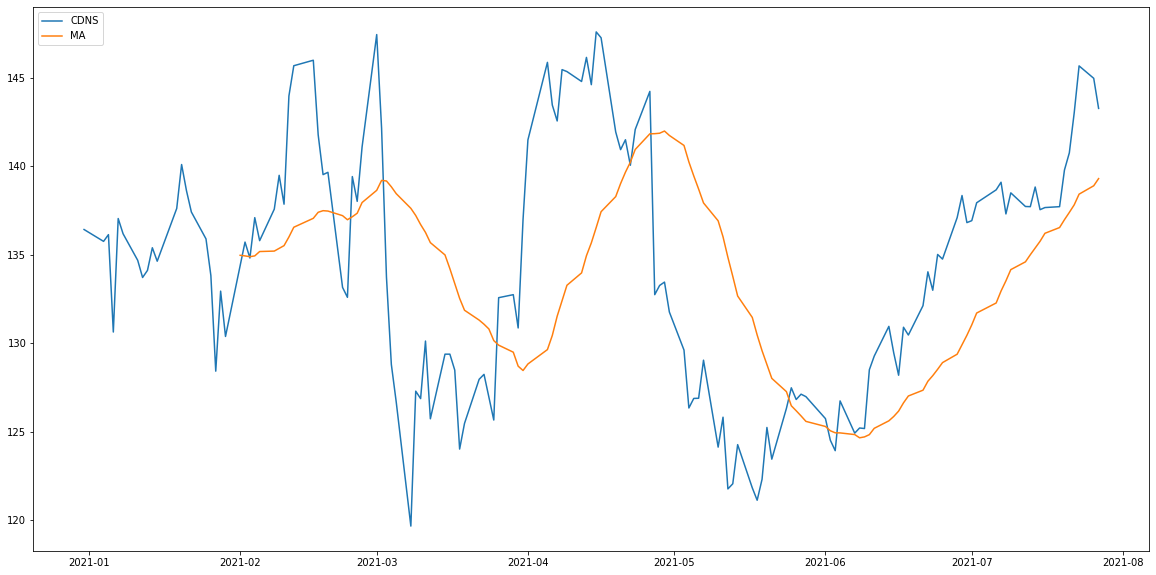

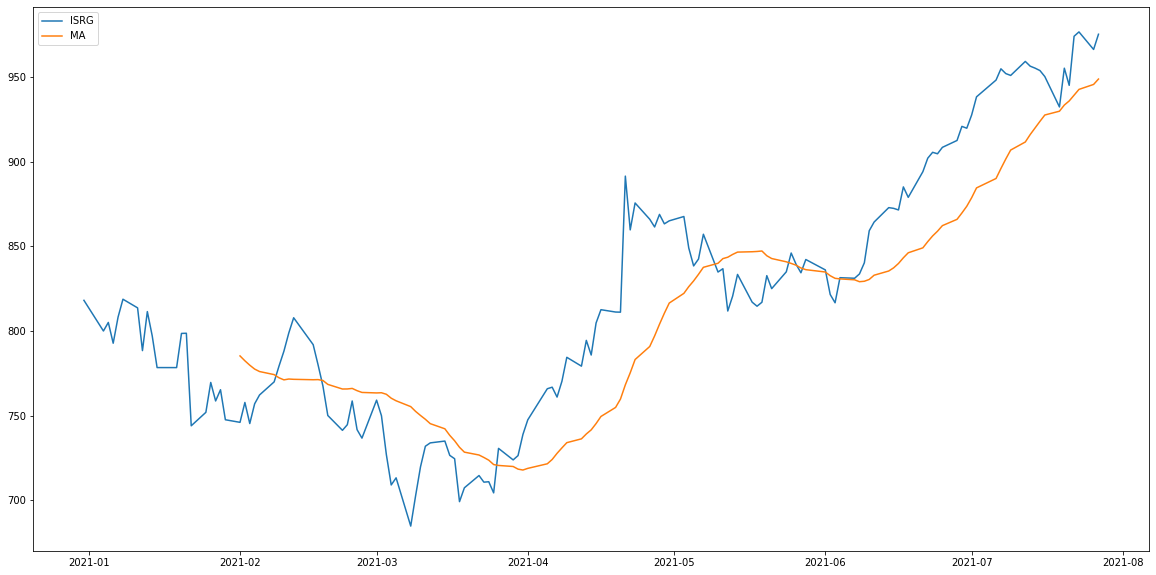

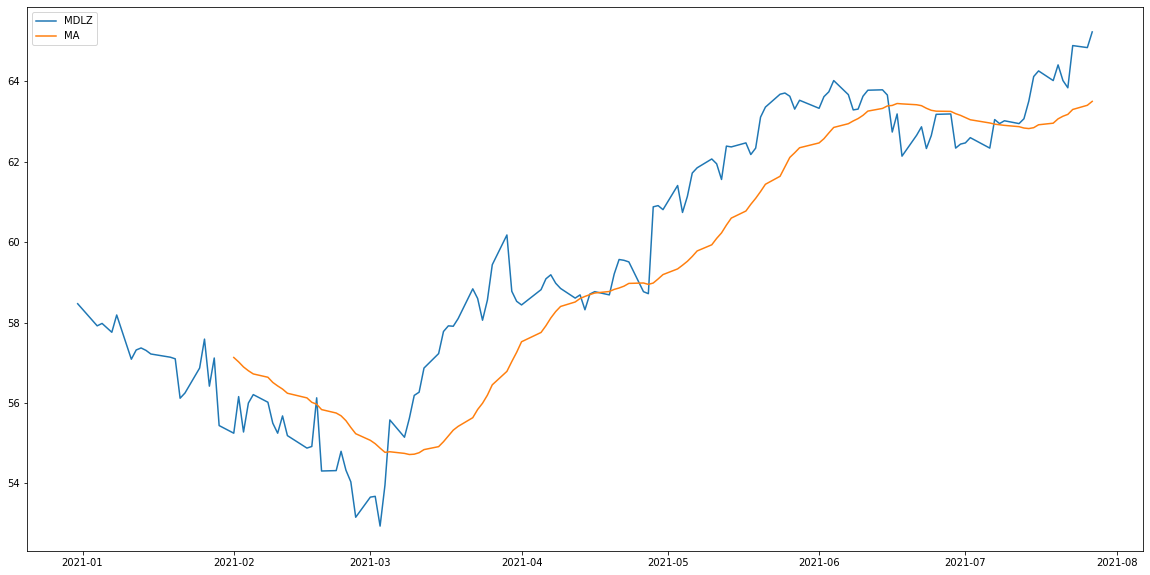

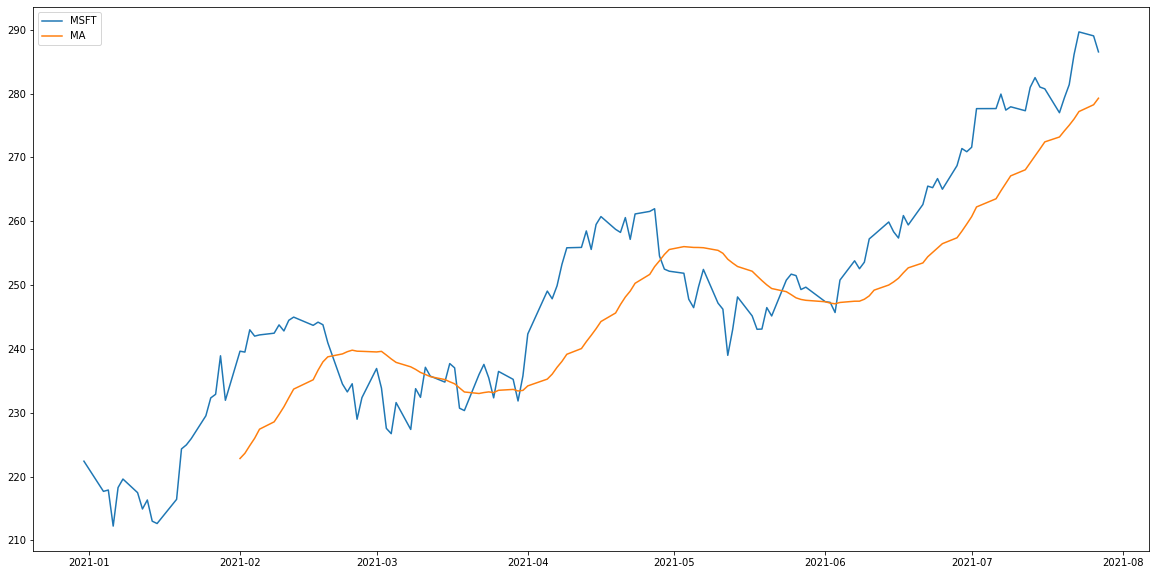

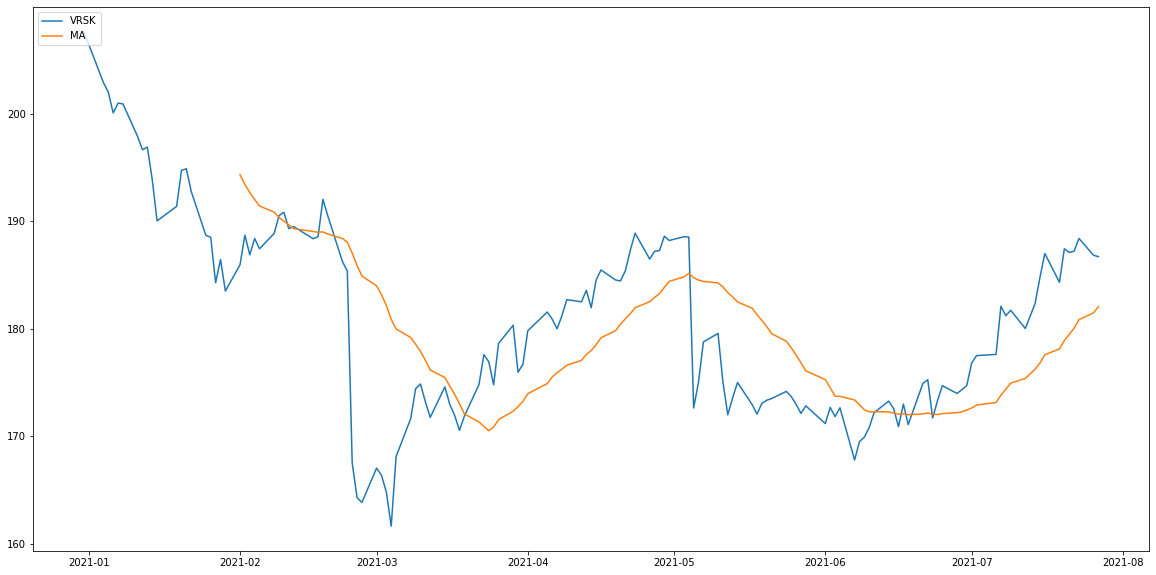

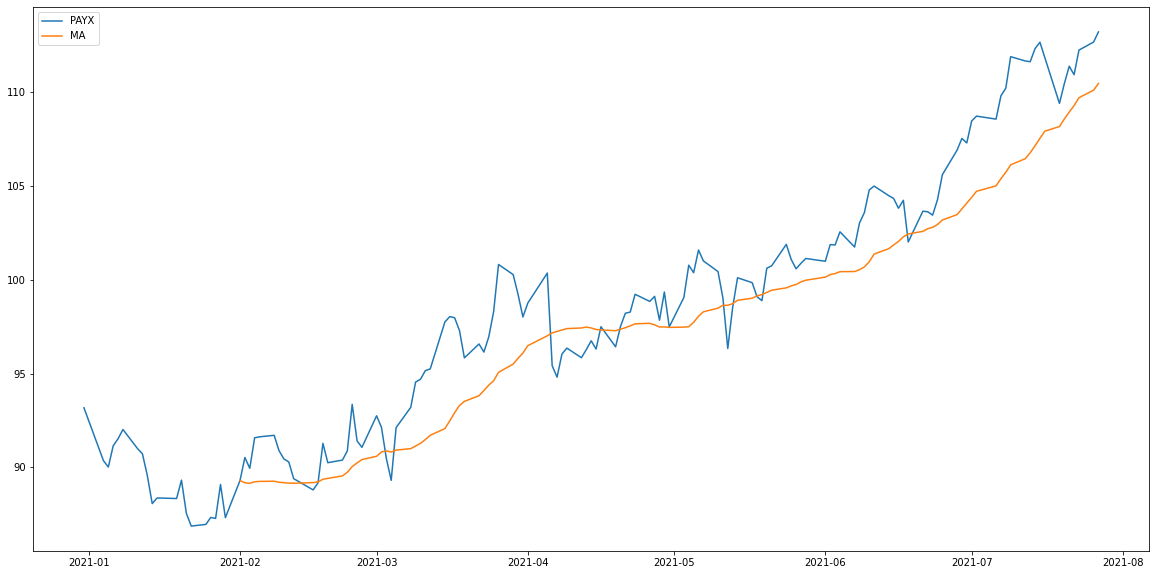

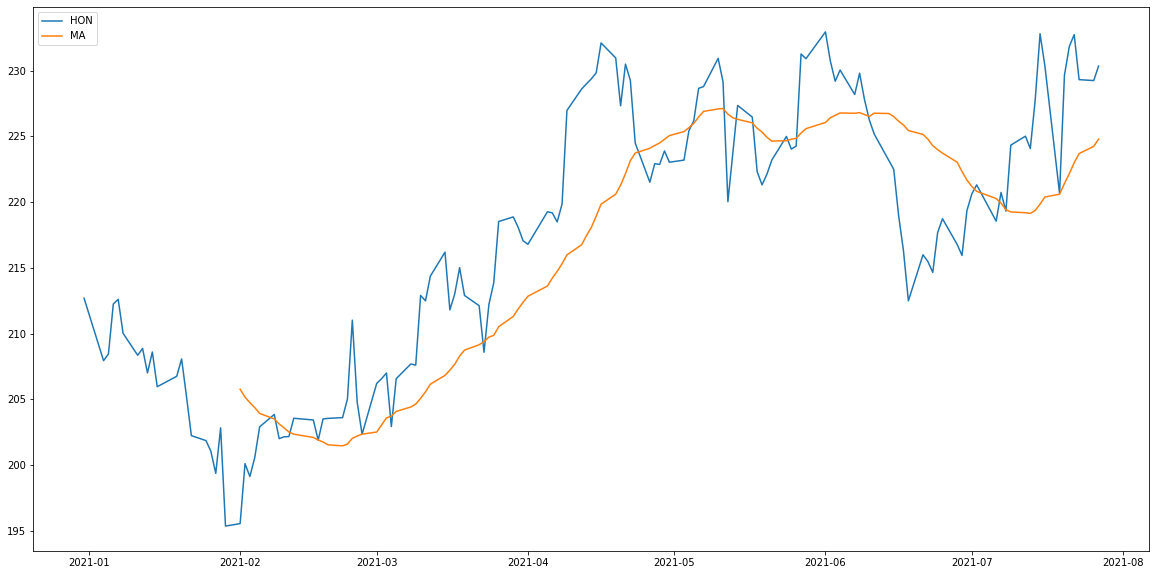

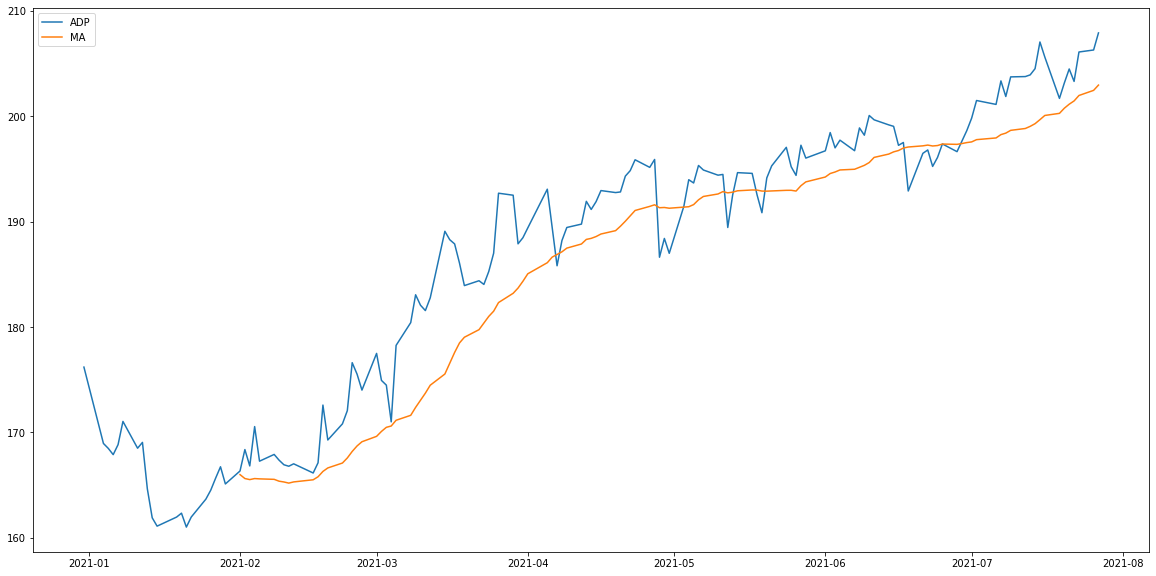

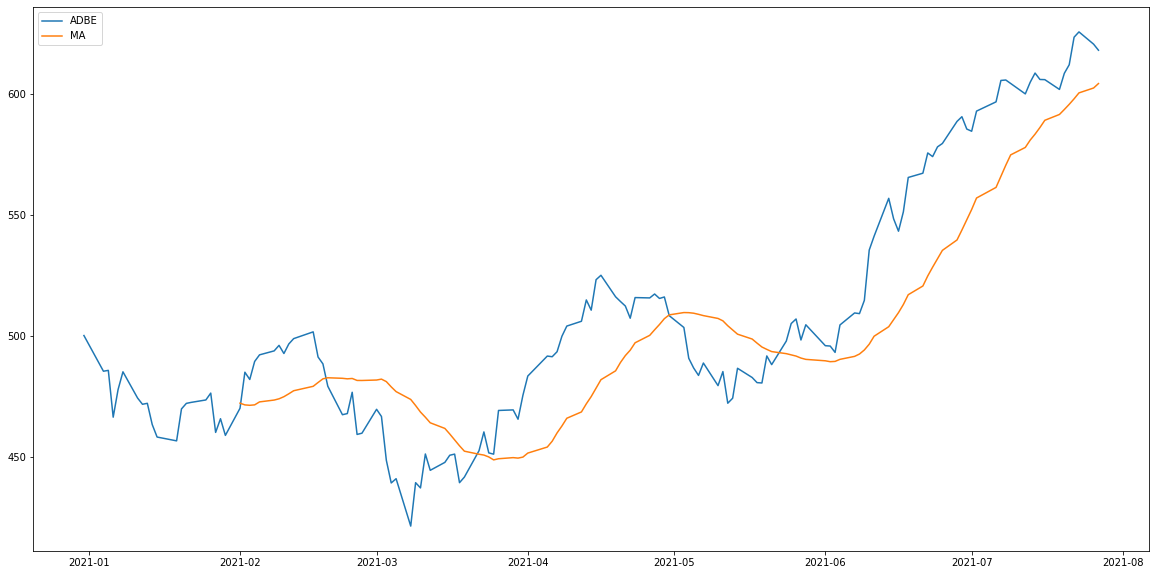

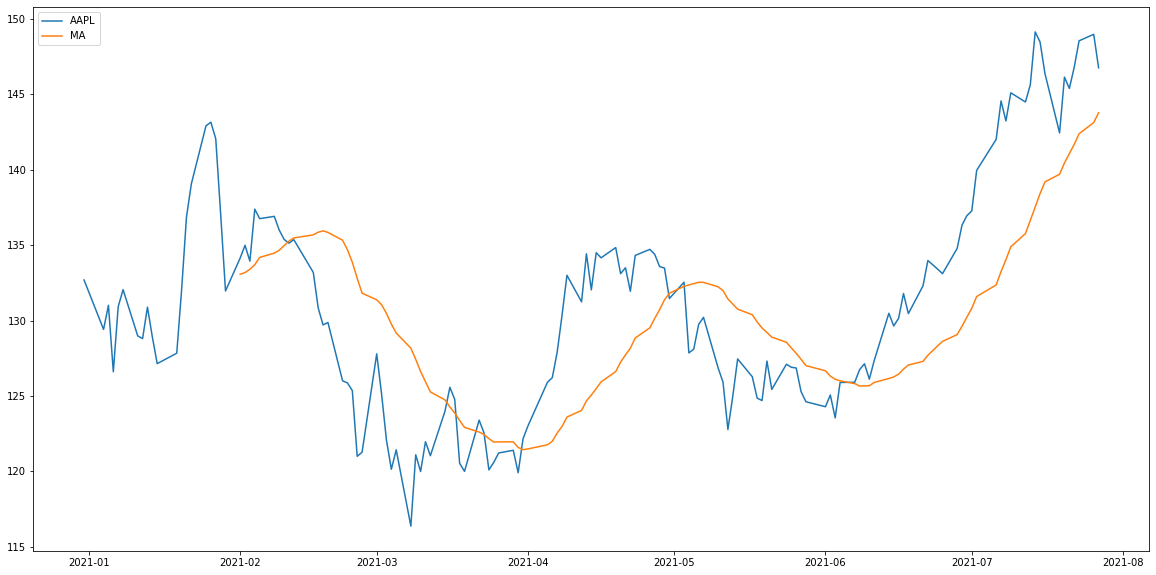

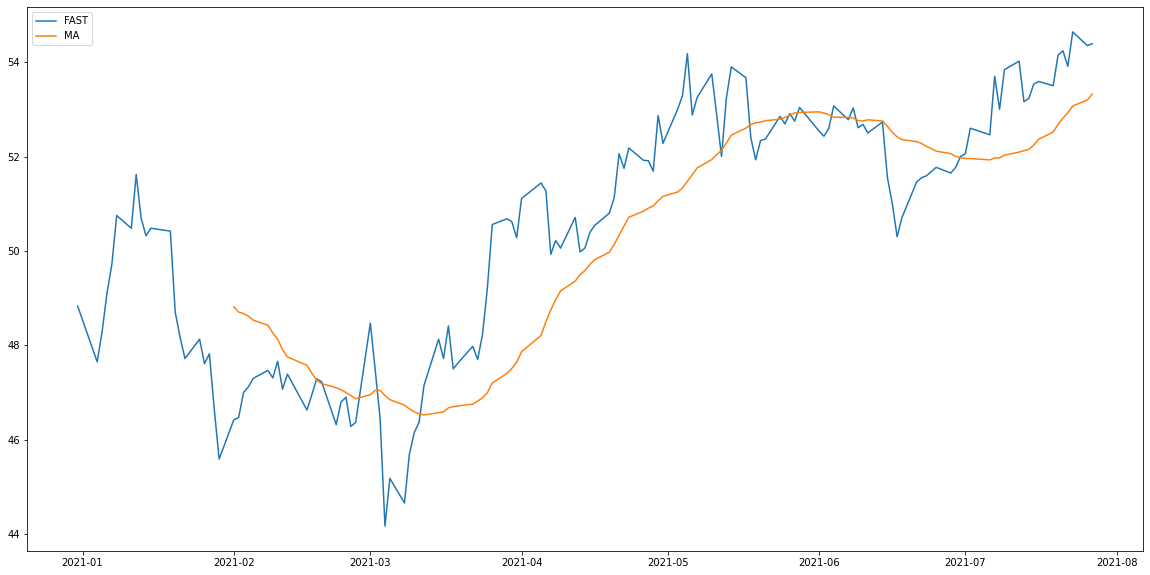

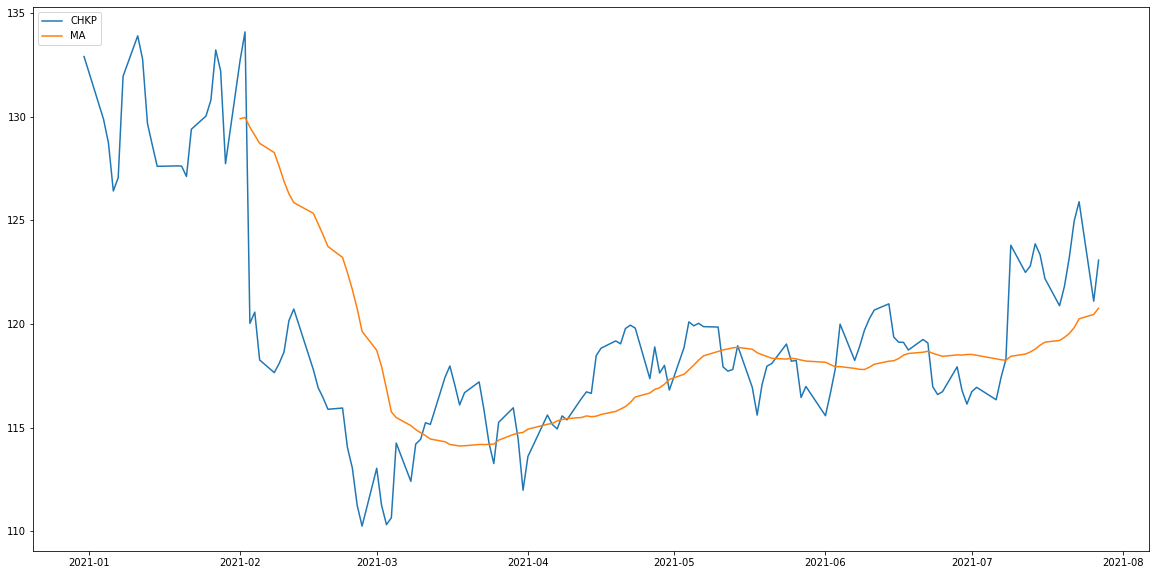

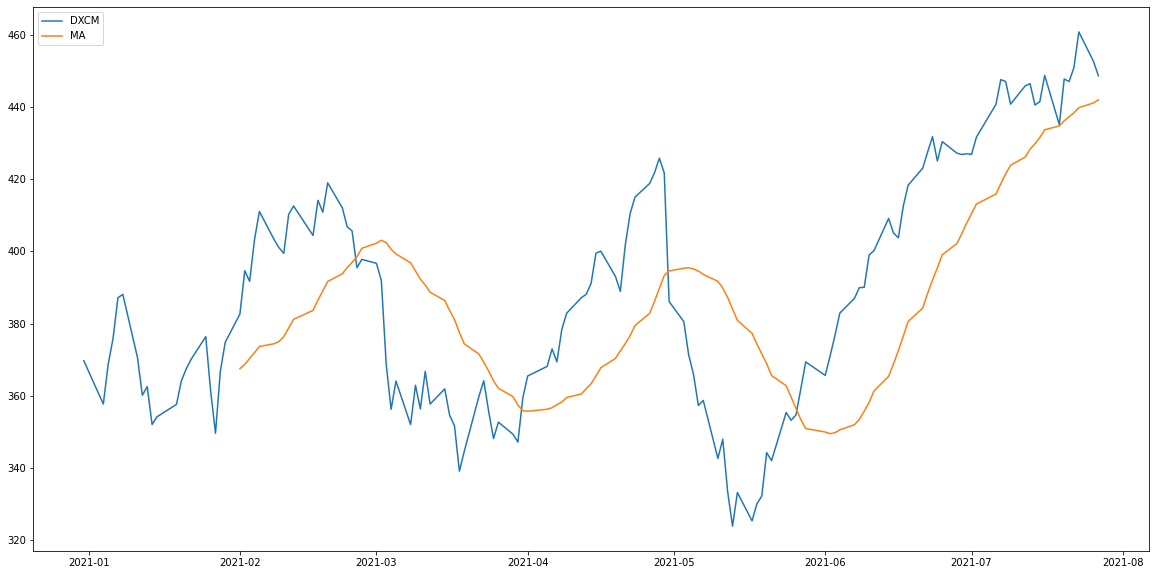

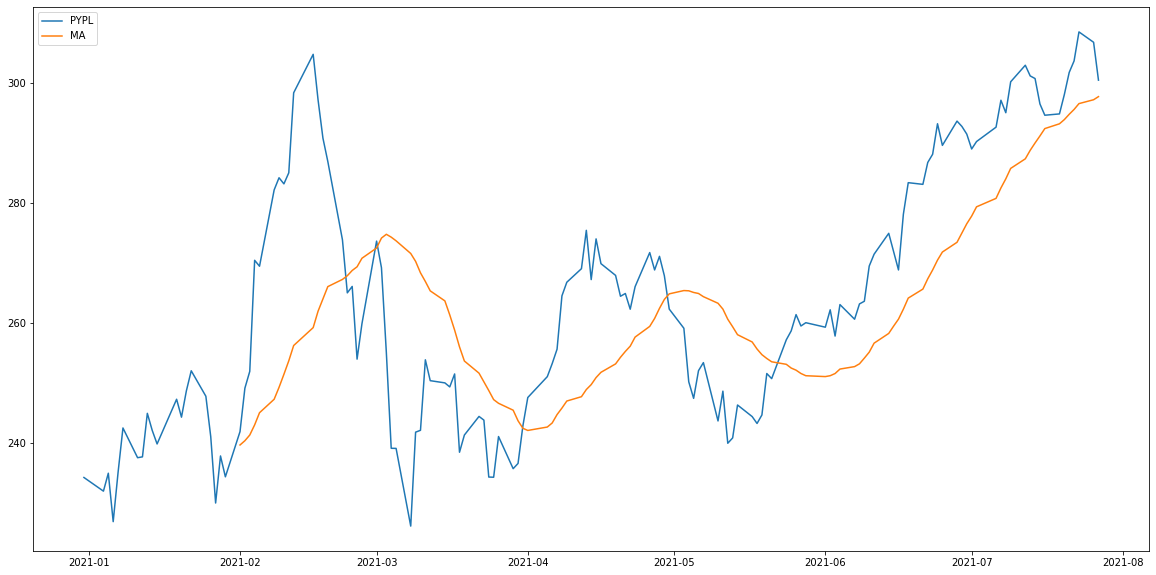

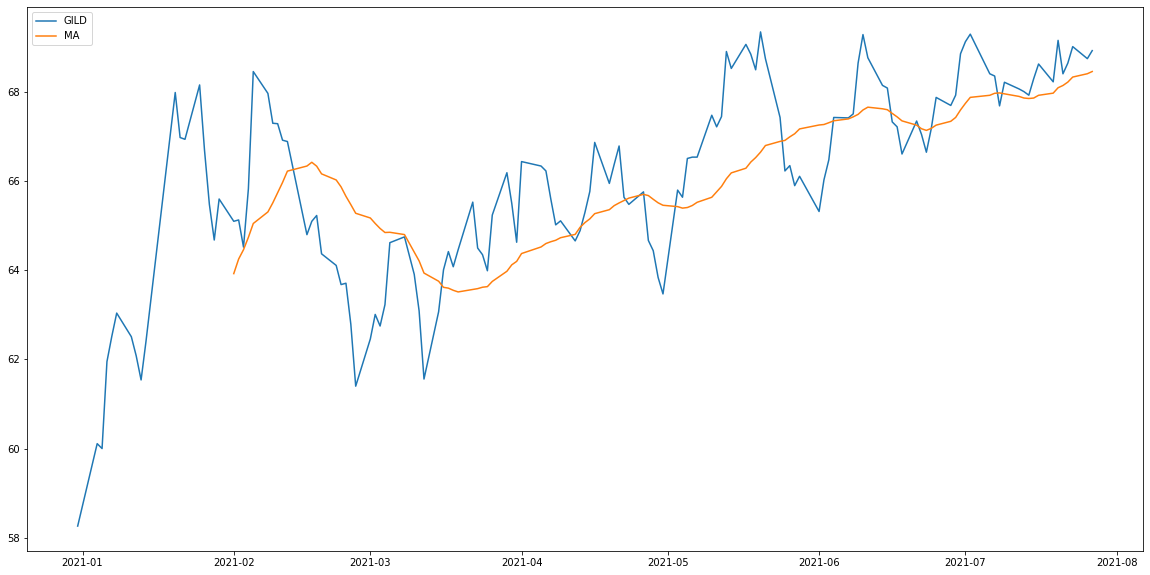

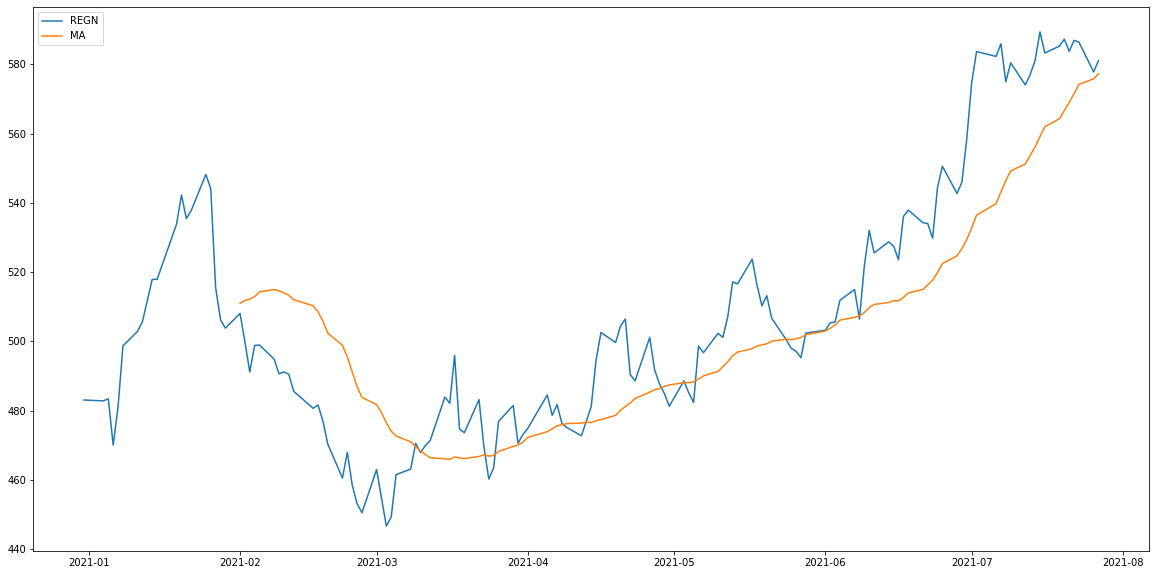

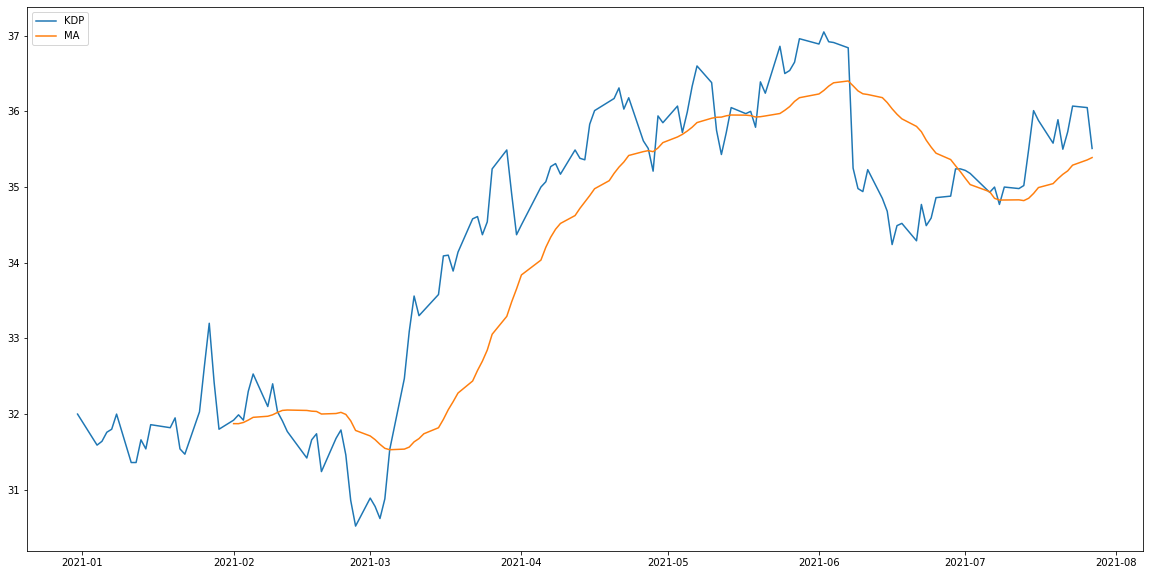

In [17]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote); 
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);